In [2]:
import pandas as pd
import os
import sys
from camelsp import Bundesland
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../camelsp')
from util import _get_logo

In [12]:
#bl =  Bundesland('Ba-Wü')
#nuts_id = 'DE110000'

bl =  Bundesland('DEF')
nuts_id = 'DEF10000'


In [16]:
logo = _get_logo()
df =  bl.get_data(nuts_id)
df_nan = df.replace(-999, np.NaN)
df_nan

,q,q_flag,w,w_flag
date,,,,
1984-11-01,NaN,NaN,649,True
1984-11-02,NaN,NaN,650,True
1984-11-03,NaN,NaN,650,True
1984-11-04,NaN,NaN,649,True
1984-11-05,NaN,NaN,649,True
...,...,...,...,...
2023-03-11,NaN,NaN,650,True
2023-03-12,NaN,NaN,650,True
2023-03-13,NaN,NaN,651,True


In [17]:
nuts_ids = bl.nuts_table.nuts_id.values.tolist()
nuts_ids[0:5]

['DEF10000', 'DEF10010', 'DEF10020', 'DEF10030', 'DEF10040']

/home/camel/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:1003: UserWarning: Warning: converting a masked element to nan.
  self._points[:, 0] = interval
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/camel/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/home/camel/anaconda3/lib/python3.9/site-packages/matplotlib/ticker.py:795: UserWarning: Warning: converting a masked element to nan.
  locs = (np.asarray(_locs) - self.offset) / 10. ** self.orderOfMagnitude


ValueError: cannot convert float NaN to integer

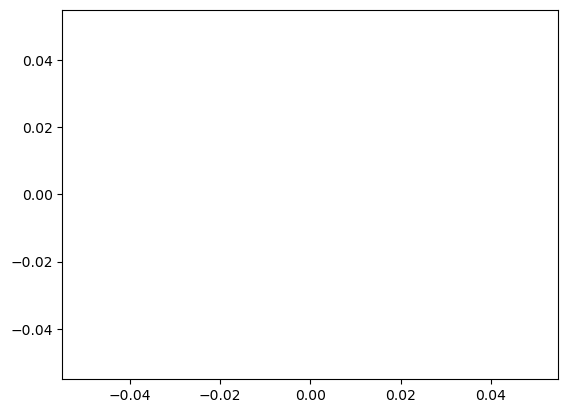

In [25]:
fig, ax = plt.subplots()
scatter = ax.scatter(df_nan['q'], df_nan['w'], c=df_nan.index.year)
legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Year")
ax.add_artist(legend1)
ax.set_title(nuts_id)
ax.grid(True)
ax.set_xlabel('q')
ax.set_ylabel('w')
fig.tight_layout()

In [3]:
%matplotlib agg
temp = bl.generate_scatter_plots(nuts_ids = nuts_id,fmt='object')

In [4]:
temp

{'DE110000': <Figure size 640x480 with 1 Axes>}

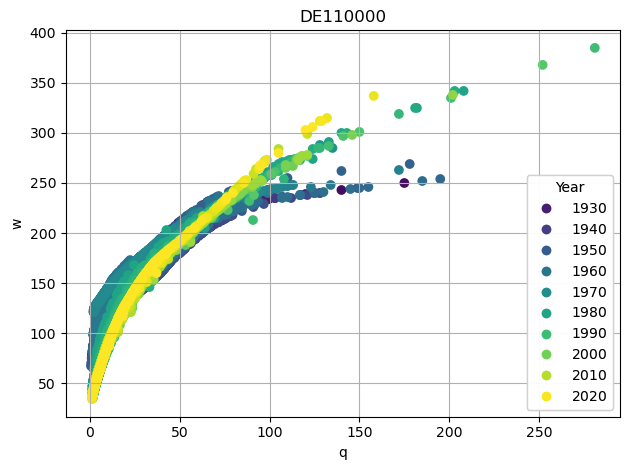

In [5]:
temp[nuts_id]

## Playground ydata_profiling

In [ ]:
# normal report
report = df.profile_report(html={'style': {'logo': logo, 'theme': 'flatly'}}, progress_bar=False, title=nuts_id)
report.to_file('standard.html')

In [ ]:
# remove the obviously wrong -999 values
report = df_nan.profile_report(html={'style': {'logo': logo, 'theme': 'flatly'}}, progress_bar=False, title=nuts_id)
report.to_file('filtered.html')

In [ ]:
# report with scatter_threshold set to 100000 to force individual points.
report = df_nan.profile_report(html={'style': {'logo': logo, 'theme': 'flatly'}}, progress_bar=False, title=nuts_id)
report.config.plot.scatter_threshold = 100000
report.to_file('filtered_scatter_threshold.html')

In [ ]:
df_filtered = df_nan[~(df_nan['q'].isna() | df_nan['w'].isna())]
df_filtered

## Playground Matplotlib

In [ ]:
q = df_nan['q']
w = df_nan['w']
c=df_nan.index

In [ ]:
fig, ax = plt.subplots()
ax.scatter(q, w, c=c)
plt.savefig('scatter_plain.png', dpi='figure')

In [ ]:
%matplotlib agg
fig, ax = plt.subplots()
scatter = ax.scatter(q, w, c=c.year)
legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Year")
ax.add_artist(legend1)
ax.set_title(nuts_id)
ax.grid(True)
ax.set_xlabel('q')
ax.set_ylabel('w')
fig.tight_layout()
#plt.savefig('scatter_year.png', dpi='figure')


In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
scatter = ax.scatter(q, w, c=c.year)
legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Year")
ax.add_artist(legend1)
ax.set_title(nuts_id)
ax.grid(True)
ax.set_xlabel('q')
ax.set_ylabel('w')
fig.tight_layout()
#plt.savefig('scatter_year.png', dpi='figure')


In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(q, w, c=c.year)
legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Year")
ax.add_artist(legend1)
ax.set_title(nuts_id)
ax.grid(True)
ax.set_xlabel('q')
ax.set_ylabel('w')
fig.tight_layout()
plt.savefig('scatter_year.svg', dpi='figure')


In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(q[:20000], w[:20000], c=c[:20000].year)
legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Year")
ax.add_artist(legend1)
ax.set_title(nuts_id)
ax.grid(True)
ax.set_xlabel('q')
ax.set_ylabel('w')
fig.tight_layout()
plt.savefig('scatter_year_small.svg', dpi='figure')
